<a href="https://colab.research.google.com/github/AnnJungChan/TECHLOSS_SIGNLAB/blob/main/DATA_BASIC_STAT/ECU_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECU 테이블의 PCA 적용

- ECU 테이블은 너무 많은 칼럼이 존재하기 때문에, 차원의 저주에 걸릴 가능성이 높음

- 차원의 저주를 방지하고자 ECU 테이블에 PCA를 적용하여 차원을 축소시킴

# 결론

- 데이터 셋에 관한 연관관계를 알아야 PCA적용가능. PCA를 적용하면 원래 데이터의 숫자가 날라가고, 축소된 데이터의 칼럼의 의미를 정확하게 알 수 없으므로, 칼럼의 의미를 정확하게 알기위해선 FA의 VARIMAX가 필요하며, 데이터를 안전하게 축소시키기 위해선 잘 정제된 데이터가 필요함.

- 데이터를 정제한 후 PCA를 진행하는 것이 맞음. 또한, 최종 데이터 셋이서 PCA를 진행하는 것이 맞음

# 패키지 로딩

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Mounted at /content/gdrive


# 데이터 로딩

In [4]:
ECU = pd.read_csv('/content/gdrive/MyDrive/DB/ECU.csv')

In [5]:
ECU

,SHIP_ID,D_INDEX,DEVICE_ID,CONTROL,V1,V2,V3,V4,V5,V6,...,C5,C6,C7,C8,TEMP,CURRENT,VOLTAGE,CONTROL_CURRENT,SYSTEM,SECTION
0,T140113-00101,1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,-9999.0,64,0.2,-1,0,0
1,T140113-00102,1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,-9999.0,0,0.0,-1,0,0
2,T140113-00103,1,1,34,3.8,3.7,3.9,4.0,3.9,4.0,...,738,736,736,736,3.9,5897,3.9,5901,0,0
3,T140113-00104,1,1,34,3.9,4.0,3.9,4.0,3.3,0.0,...,660,4,658,657,3.2,4609,3.8,5306,0,0
4,T140128-00703,1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,-9999.0,0,0.0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620530,T20200113001,19680,9,34,6.4,6.5,6.9,6.9,7.2,7.3,...,717,717,718,717,0.0,5738,7.1,5745,1,1
620531,T20200113001,19683,9,34,7.1,7.1,7.5,7.5,8.0,8.0,...,850,848,850,831,0.0,6769,7.8,8000,1,1
620532,T20200113001,19686,9,34,7.6,7.7,8.3,8.2,8.8,8.9,...,989,989,989,989,0.0,7913,8.6,7927,1,1
620533,T20200113001,19689,9,34,7.7,7.8,8.2,8.1,8.7,8.8,...,997,997,997,998,0.0,7979,8.6,7991,1,1


In [6]:
ECU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620535 entries, 0 to 620534
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SHIP_ID          620535 non-null  object 
 1   D_INDEX          620535 non-null  int64  
 2   DEVICE_ID        620535 non-null  int64  
 3   CONTROL          620535 non-null  int64  
 4   V1               620535 non-null  float64
 5   V2               620535 non-null  float64
 6   V3               620535 non-null  float64
 7   V4               620535 non-null  float64
 8   V5               620535 non-null  float64
 9   V6               620535 non-null  float64
 10  V7               620535 non-null  float64
 11  V8               620535 non-null  float64
 12  C1               620535 non-null  int64  
 13  C2               620535 non-null  int64  
 14  C3               620535 non-null  int64  
 15  C4               620535 non-null  int64  
 16  C5               620535 non-null  int6

In [7]:
ECU.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID', 'SYSTEM', 'SECTION'], inplace = True)

ECU에서 차원을 축소시킬 수 없는 INDEX 값과 ID 값은 제외를 시킴 <BR>
(INDEX와 ID, SYSTEM, SECTION은 숫자로 표기되어있지만, 수치적인 의미를 나타내는 변수가 아니기 때문이다.)

# PCA

### scaler 적용

In [8]:
ECU_SCALE = StandardScaler().fit_transform(ECU)

In [9]:
pd.DataFrame(ECU_SCALE)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.438557,-0.987302,-1.005973,-0.922912,-0.808484,-0.766409,-0.771133,-0.763244,-0.774539,-0.962222,...,-0.900819,-0.790518,-0.758117,-0.752592,-0.749890,-0.756337,-0.575224,-1.810755,-2.240515,-0.353537
1,-0.438557,-0.987302,-1.005973,-0.922912,-0.808484,-0.766409,-0.771133,-0.763244,-0.774539,-0.962222,...,-0.900819,-0.790518,-0.758117,-0.752592,-0.749890,-0.756337,-0.575224,-1.839380,-2.356543,-0.353537
2,2.323519,0.743008,0.688342,0.866846,1.033316,1.029776,1.059552,1.040776,1.065932,0.914355,...,0.993173,1.175934,1.230321,1.235602,1.244053,1.224535,1.734776,0.798083,-0.094002,2.873993
3,2.323519,0.788543,0.825719,0.866846,1.033316,0.753440,-0.771133,1.040776,1.019920,0.715479,...,0.785296,0.968379,1.020161,-0.741786,1.032739,1.011914,1.734614,0.222019,-0.152015,2.548615
4,-0.438557,-0.987302,-1.005973,-0.922912,-0.808484,-0.766409,-0.771133,-0.763244,-0.774539,-0.962222,...,-0.900819,-0.790518,-0.758117,-0.752592,-0.749890,-0.756337,-0.575224,-1.839380,-2.356543,-0.353537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620530,2.323519,1.926905,1.970527,2.243584,2.368620,2.549624,2.569866,2.937310,2.998426,0.868460,...,0.939279,1.117393,1.173739,1.184276,1.195288,1.173398,1.733875,0.726969,1.762443,2.788684
620531,2.323519,2.245646,2.245281,2.518931,2.644890,2.918072,2.890236,3.307366,3.274497,1.194822,...,1.278042,1.463318,1.532089,1.538153,1.552898,1.480218,1.733875,1.188089,2.168540,4.021839
620532,2.323519,2.473318,2.520035,2.886061,2.967205,3.286520,3.302140,3.723678,3.734615,1.559428,...,1.637336,1.843836,1.906605,1.919044,1.929471,1.905459,1.733875,1.699749,2.632651,3.981918
620533,2.323519,2.518853,2.565827,2.840170,2.921160,3.240464,3.256373,3.723678,3.734615,1.582375,...,1.657867,1.862463,1.928160,1.940654,1.951145,1.929682,1.733875,1.729268,2.632651,4.016917


데이터가 각 칼럼별로 또는 칼럼 내에서 범위가 매우 크고, 분포하는 범위가 매우 크기 때문에, 이러한 범위로 인한 오류를 최소화하기 위해서 스케일러를 사용해 같은 범위 내에 존재하도록 데이터를 변환시켰다.

In [14]:
pca = PCA(n_components = 21)
pca.fit(ECU_SCALE)
ECU_pca = pca.transform(ECU_SCALE)

스케일링 시킨 데이터를 PCA를 이용하여 차원을 축소시켰다.
이 때, n_components를 21로 한 이유는, 어떻게 차원을 축소시켰는지 정확하게 알기 위해서이다. <br>
후에 설명력을 이용해서 우리가 원하는 차원만 선별하므로, 지금 단계에서 21개의 차원을 그대로 print해도 상관없다.

In [15]:
print(pd.DataFrame(pca.explained_variance_))

            0
0   14.590516
1    1.775089
2    1.564930
3    1.118383
4    0.776236
5    0.292449
6    0.244353
7    0.167774
8    0.135899
9    0.114304
10   0.061166
11   0.046797
12   0.029541
13   0.023493
14   0.018746
15   0.012400
16   0.009836
17   0.006874
18   0.005184
19   0.003386
20   0.002677


이 때, 분산이 가장 큰 것은 당연히 첫번째 주성분이다. 첫번째 주성분이 월등히 크게 나왔다는 것을 확인할 수 있다.

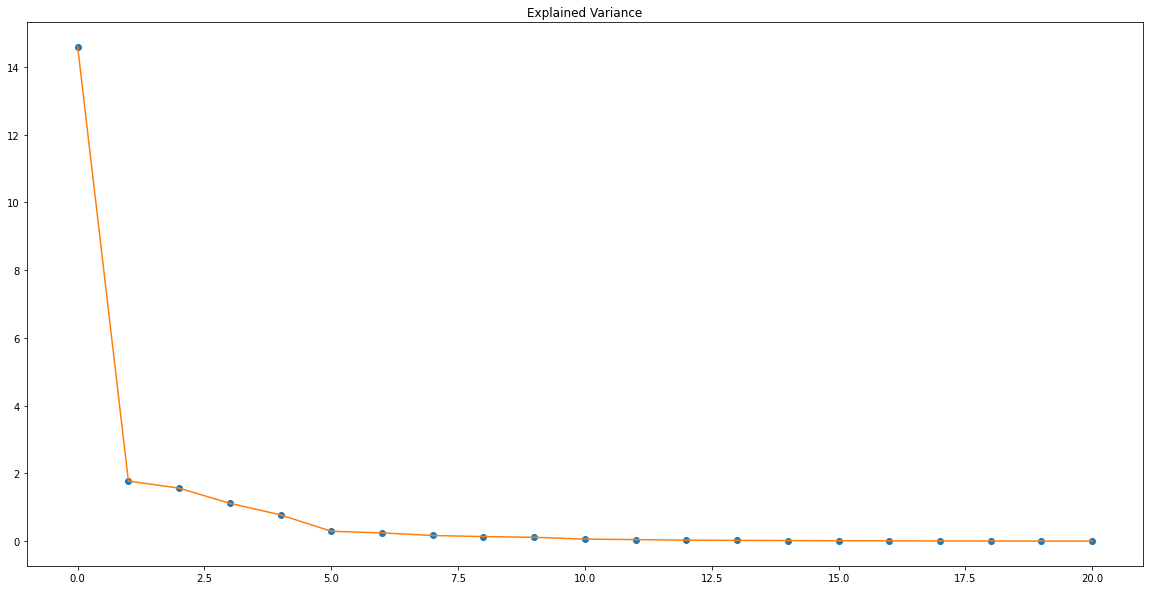

In [21]:
plt.figure(figsize = (20,10))
plt.plot(pca.explained_variance_, "o")
plt.plot(pca.explained_variance_)
plt.title("Explained Variance")
plt.savefig("Explained Variance")

이 때, 주성분 1번이 대부분의 변수를 설명해준다는 사실을 알 수 있다.

In [23]:
print(np.round(pca.explained_variance_ratio_,3))

[0.695 0.085 0.075 0.053 0.037 0.014 0.012 0.008 0.006 0.005 0.003 0.002
 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.   ]


이를 비율로 본다면, <br>
1번 주성분이 65.9%를 설명하였고, <br>
2번 주성분이 8.5%, <br>
3번 주성분이 7.5%를 설명하였다는 사실을 알 수 있다. <br>
보통 전체 데이터의 80%이상을 설명하면 설명력이 굉장히 높다고 판정하는데, 이 경우 주성분을 3개만 써도 전체 데이터를 잘 설명한다고 할 수 있다.

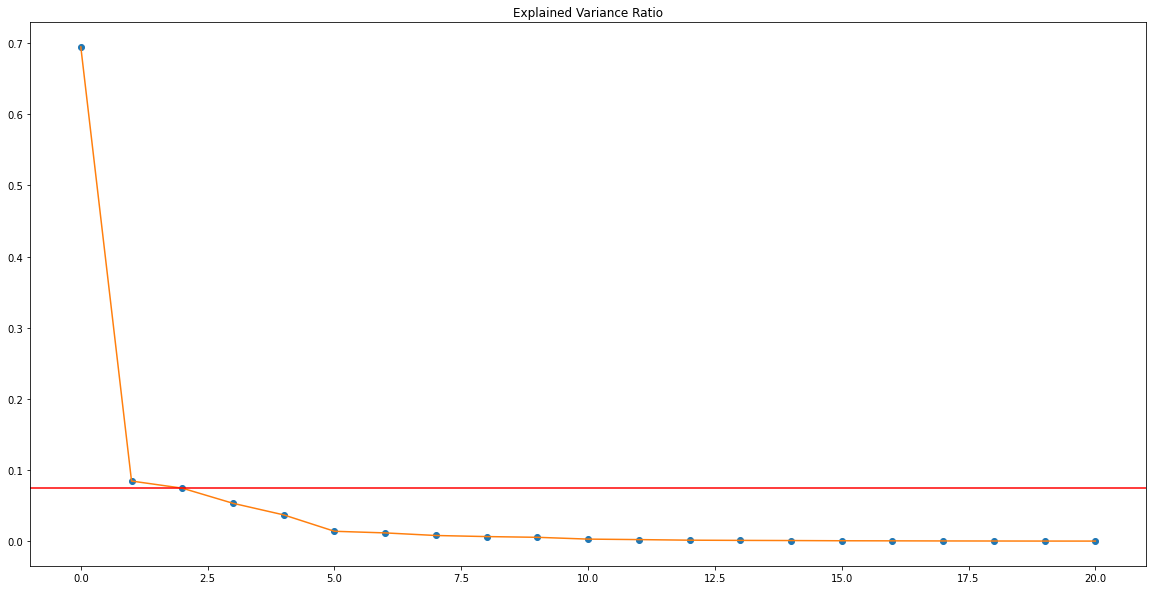

In [24]:
plt.figure(figsize = (20,10))
plt.plot(pca.explained_variance_ratio_, "o")
plt.plot(pca.explained_variance_ratio_)
plt.title("Explained Variance Ratio")
plt.axhline(0.075, color = "red")
plt.savefig("Explained Variance Ration")

두번째 주성분 또는 세번째 주성분 까지 사용하면 될 것으로 판단된다.

In [25]:
print(pd.DataFrame(pca.components_))

          0         1         2         3         4         5         6   \
0   0.128991  0.229329  0.233880  0.233677  0.248601  0.246290  0.247449   
1   0.603506 -0.009589  0.003471  0.027682 -0.041587 -0.070794 -0.062887   
2  -0.113286  0.299599  0.288042  0.220084 -0.072173 -0.131191 -0.134725   
3   0.084197  0.109658  0.107597  0.102307 -0.082453 -0.120863 -0.124725   
4  -0.072621  0.209143  0.204251  0.173038  0.200645  0.213632  0.214648   
5  -0.040980  0.122715  0.100907 -0.131006 -0.005115  0.109572  0.064734   
6  -0.038891 -0.188684 -0.108054  0.569748  0.167148  0.022025  0.024333   
7   0.010213 -0.297890 -0.193902 -0.019212 -0.017513 -0.129394 -0.094267   
8   0.746043  0.069153  0.002977  0.009409  0.107623 -0.111003  0.001070   
9   0.104203 -0.083483 -0.055505  0.093843 -0.568677  0.074254  0.116310   
10 -0.067726 -0.122814  0.115607 -0.041712  0.063670 -0.264983 -0.274224   
11 -0.075486  0.339181 -0.343369  0.056980 -0.003506  0.002059 -0.242560   
12  0.089027

이 때, pca.components_들은 주성분이 어떻게 구성된 것인지를 알려준다.
예를들어,<br>

``` 
    PCA!        
A   0.128991  
B  -0.072621  
C  -0.067726 
```

이라는 데이터 셋이 존재할 때, <br>
PCA1 = A * 0.128991 + B * -0.072621 + C * -0.067726
이 됨을 알 수 있다.

## biplot *그리기*

In [26]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

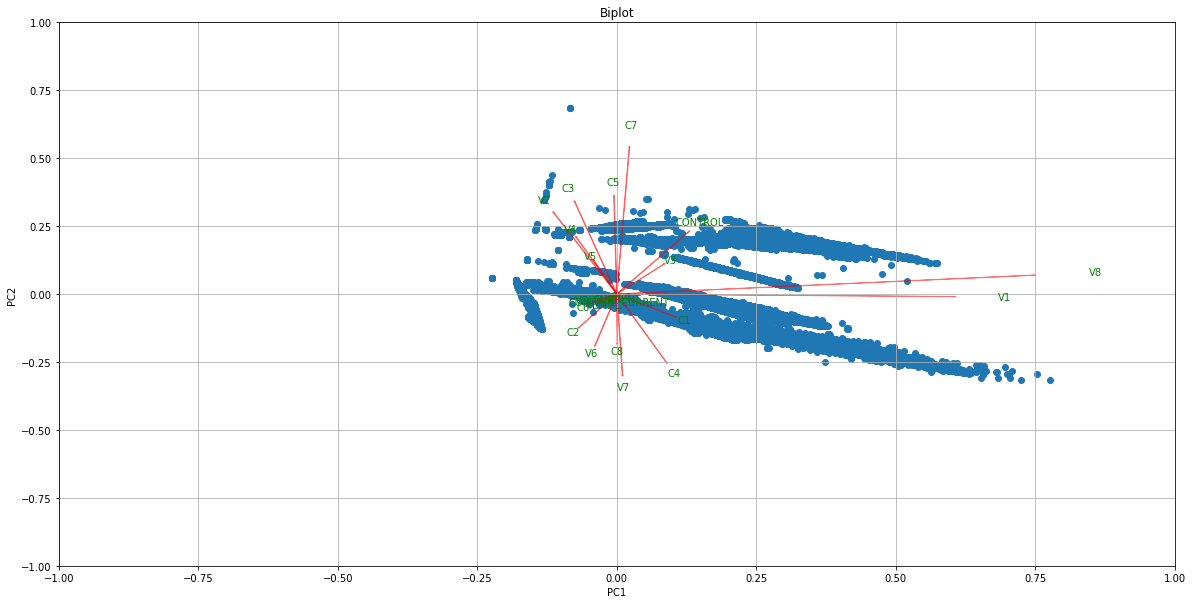

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
biplot(ECU_pca, pca.components_,1,2,labels = ECU.columns)
plt.title("Biplot")

이를 BIPLOT에 도식화해본 결과, 뚜렷한 변수의 묶음은 알 수 없었다. FA를 했을 때, 묶이는 변수가 더 자세하게 보이는 것 같아서, "VARIMAX"를 기준으로 FA를 실시하는 것이 맞다.

## CURRENT 차원축소 최종정리

In [34]:
ECU_PCA=pd.DataFrame(ECU_pca).iloc[:,0:3]

In [35]:
ECU_PCA.rename(columns = {0:'PCA1', 1: 'PCA2', 2: 'PCA3'},inplace = True)

In [36]:
ECU_PCA

,PCA1,PCA2,PCA3
0,-3.769698,0.576712,0.605048
1,-3.779033,0.601498,0.649829
2,5.006477,2.773613,-0.935621
3,3.555553,3.128548,-0.184400
4,-3.779033,0.601498,0.649829
...,...,...,...
620530,7.883009,2.044561,-1.484997
620531,9.365796,2.319075,-1.787250
620532,10.866502,1.831339,-1.965547
620533,10.892757,1.840800,-1.938623


결론적으로 PCA결과 3개의 변수만 사용해도 설명력이 80%가 넘기 때문에, 세개의 변수로 차원 축소를 진행하였다. 그 결과, 위의 620535행 3열의 데이터로 ECU테이블이 축소된 것을 확인할 수 있다.